In [379]:
from IPython.display import display, HTML

display(
    HTML(
        """<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""
    )
)

<font size="5" color="red"><b>ch3. 분류분석</b></font>

# 1절. 분류분석개요

## 1-1. 분류분석 이란?

- 타켓변수가 categorical 인 분석
  - ex. 고객등급예측, 휴먼고객예측, 상품구매예측, 보험사기자
  - 수업 ex. mnist 숫자데이터분류 예측, iris 분류예측, 와인등급예측, 질병예측
- sklearning 패키지 : 예제데이터셋, 전처리, 머신러닝 모형등의 제공

## 1-2. 샘플용 데이터 셋 접근

### load 계열 (패키지 내에 데이터 있음)

- load_iris(), load_boston(), load_diabetes()...

### fetch 계열 (패키지 내에 데이터가 없고, 인터넷 연결시 다운)

- fetch_openml(), fetch_rovl(로이터뉴스 말뭉치)

### make 계열 (가상의 데이터 생성)

- make_classification() : 분류분석용 데이터 생성
- make_regression() : 회귀분석용 데이터 생성
- make_blobs() : 군집분석용 데이터 생성 (타켓변수 x)


In [380]:
# 가상환경 확인
import sys

print(f"Python 경로: {sys.executable}")

# TensorFlow 설치 확인
try:
    import tensorflow as tf

    print(f"TensorFlow 버전: {tf.__version__}")
    print("TensorFlow가 정상적으로 설치되었습니다!")
except ImportError as e:
    print(f"TensorFlow 설치 오류: {e}")

# MNIST 데이터 로드 테스트
try:
    from tensorflow.keras.datasets import mnist

    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(f"MNIST 데이터 로드 성공! 훈련 데이터 크기: {x_train.shape}")
except Exception as e:
    print(f"MNIST 데이터 로드 오류: {e}")

Python 경로: /Users/teamkim/anaconda3/envs/ml-dl-nlp/bin/python
TensorFlow 버전: 2.12.0
TensorFlow가 정상적으로 설치되었습니다!
MNIST 데이터 로드 성공! 훈련 데이터 크기: (60000, 28, 28)


In [381]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# mnlist load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


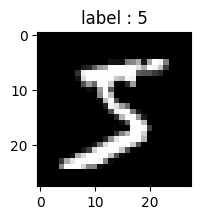

In [382]:
# 첫번쨰 이미지 출력
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0], cmap="gray")
# plt.imshow(X_train[50000], cmap='gray')
plt.title("label : {}".format(y_train[0]))
plt.show()

In [383]:
# fetch 계열 (패키지 내에 데이터가 없고, 인터넷 연결시 다운)
from sklearn.datasets import fetch_openml

# mnlist fetch : mnist, iris, boston, fashon-mnist
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False, parser="auto")

In [384]:
X, y = mnist.get("data"), mnist.get("target").astype(int)
X.shape, y.shape

((70000, 784), (70000,))

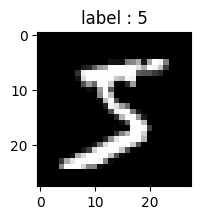

In [385]:
# type: ignore
X = X.reshape(-1, 28, 28)

# 첫번쨰 이미지 출력
plt.figure(figsize=(2, 2))
plt.imshow(X[0], cmap="gray")
plt.title("label : {}".format(y[0]))
plt.show()

# 2절. 분류분석의 종류

## 2-1. 확률적 모형

- 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
- predict_proba() : 각 분류 클래스별 활률을 알려줌 (일부 판별함수 모형에 있긴 함)
- predict_log_proba() : 확률의 로그값을 알려줌

### 1) 확률적 생성 모형

- 각 클래스별 특정 데이터 확률분포 추정 (베이즈 정리를 사용). 소량의 데이터로도 작동
- ex. QDA (Quadratic Discriminant Analysis), 나이브 베이지안 (NaiveBayes)

### 2) 확률적 판별 모형

- 확률을 계산하는 함수 이용
- ex. 의사결정나무 (DecisionTree), 로지스틱 회귀 (LogisticRegression)

## 2-2. 판별함수 모향

- 주어진 데이터를 클래스에 따라 어떤 영역으로 나눠지는 경계명을 찾은 후,
- 이 경계면으로부터 어느 위치에 있는지를 계산하는 판별함수를 이용
- decision_function()
- ex. 퍼셉트론 (Perceptron), 서포트벡터머신 (SupportVectorMachine), MLP:신경망 (NeuralNetwork)

→ RandomForest, LGBM, XGBoost, CatBoost 등의 앙상블 모형이 더 많이 쓰임


# 3절 분류모형1. 확률적 생성 모형

- 베이즈 정리를 사용하여 확률분포 계산

## 3-1. Quadratic Discriminant Analysis

- x가 연속형 (실수) 이면서, 정규분포라고 가정함


In [386]:
# 샘플 데이터
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=2,  # 독립변수 갯수
    n_informative=2,  # 타켓변수에 영향을 주는 독립변수 갯수
    n_redundant=0,  # 타켓변수에 영향을 주지 않는 독립변수 갯수
    n_clusters_per_class=1,  # 클래스별 내 서브 그룹수
    n_classes=2,  # 타켓변수 class 갯수
    n_samples=100,  # 데이터 갯수 (행수, 기본값)
    random_state=9,  # seed 값
)
X.shape, y.shape

((100, 2), (100,))

In [387]:
import numpy as np

np.unique(y)

array([0, 1])

In [388]:
y.mean()

0.5

In [389]:
# y=1인 데이터
X[y == 1].shape

(50, 2)

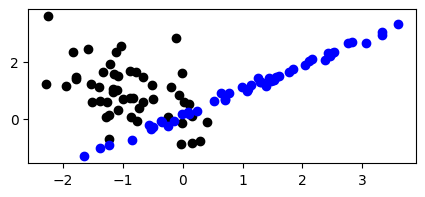

In [390]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], c="k")
plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], c="b")
plt.show()

In [391]:
# (0,0) 대칭 구조
X[y == 1] = -X[y == 0]

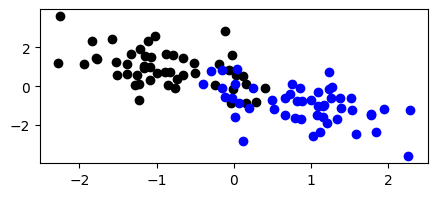

In [392]:
plt.figure(figsize=(5, 2))
plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], c="k")
plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], c="b")
plt.show()

In [393]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [394]:
x = [[5, 5]]  # 2차원 데이터 predict

model.predict(x)[0]

1

In [395]:
p = model.predict_proba(x)
print(p)  # 0으로 분류될 확률, 1로 분류될 확률

[[8.84215536e-06 9.99991158e-01]]


In [396]:
model.classes_  # 분류될 내용

array([0, 1])

In [397]:
import pandas as pd

y_hat = model.predict(X)
# y_hat
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


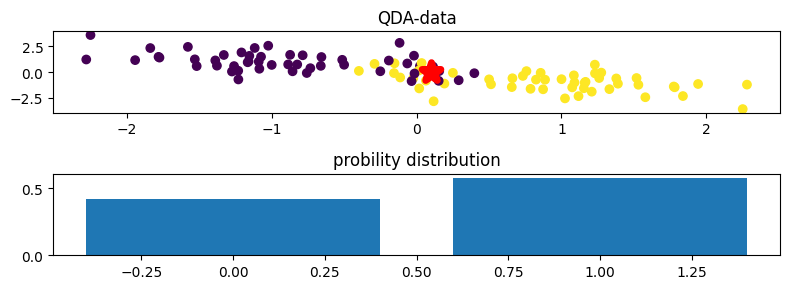

In [398]:
x = [[0.1, 0]]
plt.figure(figsize=(8, 3))
p = model.predict_proba(x)

plt.subplot(211)  # 2행 1열로 plt 그래프중 첫번쨰 그래프 (2, 1, 1)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c="r", s=200, marker="*", lw=5)
plt.title("QDA-data")
plt.subplot(212)  # 2행 1열로 plt 그래프 중 그래프 (2,1,2)
plt.bar(x=model.classes_, height=p[0])
plt.title("probility distribution")
plt.tight_layout()
plt.show()

In [399]:
model.predict(x)

array([1])

## 3-2. 나이브베이지안 모형


In [400]:
# 데이터
import seaborn as sns

iris = sns.load_dataset("iris")

# 더 구체적으로는 다음과 같은 상황입니다. (.values 사용)
#    1. 학습 (fit) 단계: 모델을 학습시킬 때 Pandas DataFrame을 사용하셨을 가능성이 높습니다. Scikit-learn 모델을 DataFrame으로 학습시키면, 모델은
#       데이터뿐만 아니라 각 열의 이름(Feature Names)까지 함께 기억합니다.


#    2. 예측 (predict) 단계: 예측을 할 때는 NumPy 배열이나 리스트 형태의 데이터를 사용하셨을 것입니다. NumPy 배열이나 리스트에는 열 이름(Feature Names)
#       정보가 없습니다.

#   따라서 모델 입장에서는 "어? 나는 '나이', '성별' 같은 열 이름을 가진 데이터로 학습했는데, 지금 들어온 데이터에는 그런 이름이 없네. 데이터 순서가
#   확실히 맞는 거야?"라는 의미로 사용자에게 경고를 보내주는 것입니다.


#   이것은 에러(Error)가 아니라 경고(Warning)이기 때문에 코드가 멈추지는 않습니다. 하지만 만약 학습 데이터와 예측 데이터의 열 순서가 다르다면, 완전히
#   잘못된 예측 결과를 내놓을 수 있기 때문에 매우 중요한 메시지입니다.

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values  # 범주형(문지열) : 라벨인코딩 없이 적용
# y

# 모형생성
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [401]:
test_x = np.array([[5.1, 3.5, 1.4, 0.2]])  # X.loc[0]

print("test_X의 예측값 :", model.predict(test_x))
print(model.classes_)
print("test_x의 확률 : ", model.predict_proba(test_x))

test_X의 예측값 : ['setosa']
['setosa' 'versicolor' 'virginica']
test_x의 확률 :  [[0.75199536 0.16092948 0.08707516]]


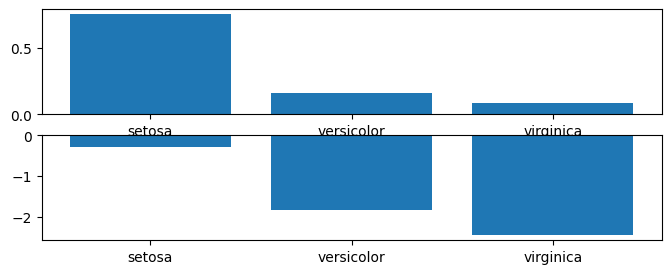

In [402]:
test_x = np.array([[5.1, 3.5, 1.4, 0.2]])  # X.loc[0]

plt.figure(figsize=(8, 3))
plt.subplot(2, 1, 1)
plt.bar(model.classes_, model.predict_proba(test_x)[0])
plt.subplot(2, 1, 2)
# 로그 확률값 (predict_proba에서의 virsicolor, virginica 차이가 적을 경우 차이값을 비교할 때 사용)
plt.bar(model.classes_, model.predict_log_proba(test_x)[0])
plt.show()

# 4절 분류모형2. 확률적 판별모형

## 4-1. 로지스틱 (LogisticRegression) 회귀분석


In [403]:
# 데이터
X, y = make_classification(
    n_features=1,  # 독립변수 갯수
    n_redundant=0,  # 타켓변수에 영향을 미치지 않는 독립변수
    n_informative=1,  # 타켓변수에 영향을 미치는 독립변수
    n_classes=2,  # 타켓변수의 class수 (0, 1)
    n_clusters_per_class=1,  # 클래스별 내 서브 그룹수
    n_samples=100,  # 데이터 수
    random_state=1,  # seed 값
)

X.shape, y.shape

((100, 1), (100,))

In [404]:
np.unique(y), y.mean()

(array([0, 1]), 0.5)

In [405]:
# 모형 생성
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

In [406]:
import numpy as np

xx = np.linspace(-3, 3, 100)  # -3부터 3까지 같은 간격의 데이터 100개 생성
# xx의 행축(axis=0)을 중가
test_x = xx.reshape(-1, 1)
test_x = xx[:, np.newaxis]
test_x = np.expand_dims(xx, axis=1)
test_x = xx[:, None]


y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)  # 앞은 0일 확률, 뒤는 1일 확률

prob0 = prob[:, 0]  # 0으로 분류될 확률
prob1 = prob[:, 1]  # 1으로 분률될 확률

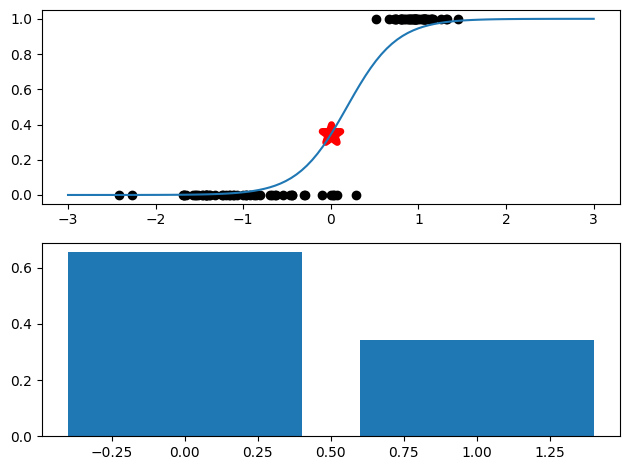

In [407]:
plt.subplot(2, 1, 1)
x = [[0]]
prob_x = model.predict_proba(x)

plt.scatter(x=X, y=y, c="k", label="0")
plt.plot(xx, prob1)
plt.scatter(x=x[0][0], y=prob_x[0][1], c="r", s=200, marker="*", lw=5)

plt.subplot(2, 1, 2)
plt.bar(x=model.classes_, height=prob_x[0])
plt.tight_layout()
plt.show()

## 4.2. 의사결정나무

- **⭐️ 종속변수에 영향을 주는 독립변수의 범주를 찾는 목족**


In [408]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data[:, 2:]  # 2번쨰, 3번쨰 열만
y = data.target
feature_name = [name[:-5] for name in data.feature_names[2:]]
print(feature_name)

# 모형생성
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion="entropy", max_depth=1, random_state=0  # 분류품질 기준  # 트리의 깊이  # 랜덤 seed
)
dt_model.fit(X, y)  # depth가 1이라 성능이 좋지 않을 예정

# 예측
print(X[130])
test_x = [[6.1, 1.9]]

print("예측값 :", dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

['petal length', 'petal width']
[6.1 1.9]
예측값 : [1]
[0 1 2]
[[0.  0.5 0.5]]


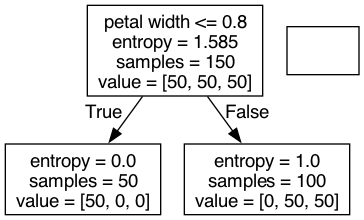

In [409]:
# 분류모형의 시각화
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image


def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    # image = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


draw_decision_tree(dt_model, feature_name)

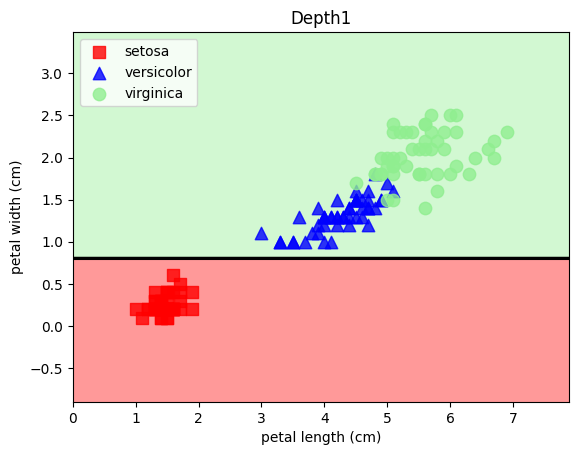

In [410]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, model, title):
    species = ["setosa", "versicolor", "virginica"]
    resolution = 0.01
    markers = ("s", "^", "o")
    colors = ("red", "blue", "lightgreen")
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(["k"]))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],
            marker=markers[idx],
            s=80,
            label=species[cl],
        )

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc="upper left")
    plt.title(title)

    return Z


plot_decision_regions(X, y, dt_model, "Depth1")
plt.show()

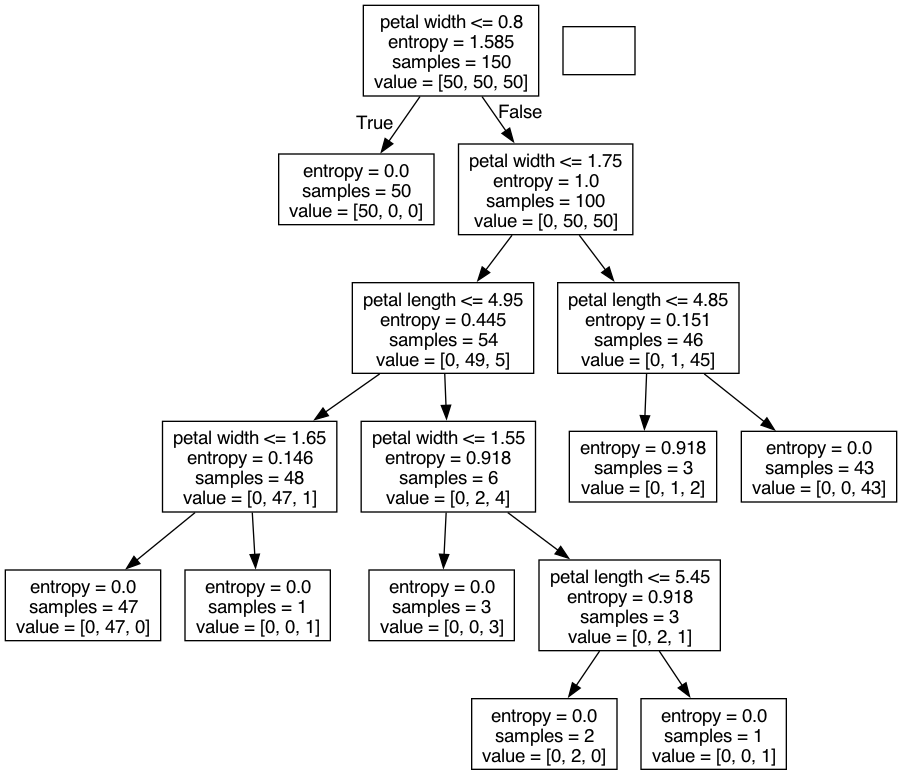

In [411]:
dt_model5 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)

dt_model5.fit(X, y)

draw_decision_tree(dt_model5, feature_name)

In [412]:
try:
    import mlxtend

    print(f"mlxtend 버전: {mlxtend.__version__}")
    print("mlxtend가 정상적으로 설치되었습니다!")
except ImportError as e:
    print(f"mlxtend 설치 오류: {e}")
    print("터미널에서 다음 명령어로 설치하세요:")
    print("pip install mlxtend")

mlxtend 설치 오류: No module named 'mlxtend'
터미널에서 다음 명령어로 설치하세요:
pip install mlxtend


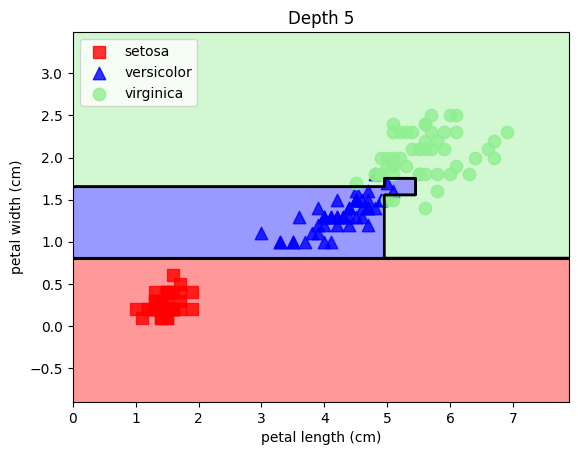

In [413]:
# 결정 경계 시각화
plot_decision_regions(X, y, dt_model5, "Depth 5")
plt.show()

In [414]:
pred = dt_model5.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절. 분류분석 모향3. 판별함수 모형

- SVM, 퍼셉트론, MLP (predict_prob()),...
- predict_prob() 대신 decistion_function()

## 5.1. SVM의 SVC


In [415]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
idx = pd.Series(iris.target).isin([0, 2])

print(idx.tolist())

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [416]:
X = iris.data[idx]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [417]:
from sklearn.svm import SVC

model = SVC()
model.fit(X, y)

SVC()

In [418]:
y_hat = model.predict(X)
# y_hat
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [419]:
X[0]

x = [[5.1, 3.5, 1.4, 0.2]]

model.predict(x)
model.decision_function(x)

array([-1.14828042])

## 5.2. 퍼셉트론


In [420]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=100, eta0=0.1, random_state=1)  # 학습횟수 epoch 100회  # learning rate
model.fit(X, y)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [421]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [422]:
x = [[5.1, 3.5, 1.4, 0.2]]

pred = model.predict(x)
df = model.decision_function(x)

print("예측값 :", pred)
print("판별함수 결과:", df)

예측값 : [0]
판별함수 결과: [-0.601]


## 5.3. 다중 퍼셉트론 (인공신경망)

- predict / decision_function / predict_prob / predict_log_proba


In [423]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500, activation="relu")

model.fit(X, y)

y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


# 6절. 분류모형 성능평가

- 혼동행렬 (교차표)
- score 함수 : accuracy, recall, precision, f1_score, fbeta_score
- ROC 커브 → roc 커브 영역 확인
- ex. 두 모형이 혼동행렬이 같은 경우

## 6-1. 혼동행렬 (교차표)


In [424]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2]  # 실재값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1]  # 예측값

# 혼동행렬
from sklearn.metrics import confusion_matrix  # 그룹이 2개일 떄

confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]])

In [425]:
# 교차표
pd.crosstab(y_true, y_pred, colnames=["예측값"], rownames=["실재값"])  # 그룹이 3개 이상일 떄

예측값,0,1,2
실재값,,,
0,2,1,0
1,1,2,0
2,0,2,1


## 6-2. 혼동행렬을 이용한 평가

- 각종 score() 함수


In [426]:
result = pd.read_csv("./data/model_result.csv")  # 보험사기자 예측 실재값과 예측값
result.sample(3)

,CUST_ID,y_true,y_pred
197,2371,0,0
1015,12612,0,0
1102,13665,0,1


In [427]:
result.isnull().sum()  # 결측치 갯수

CUST_ID    0
y_true     0
y_pred     0
dtype: int64

In [428]:
result.shape

(1793, 3)

In [429]:
result["y_true"].value_counts()

0    1635
1     158
Name: y_true, dtype: int64

In [430]:
pd.crosstab(
    result["y_true"],
    result["y_pred"],
    margins=True,  # 합계출력
    colnames=["예측값"],
    rownames=["실재값"],
)

예측값,0,1,All
실재값,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [431]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score

# 정확도 : 전체중에서 맞게 예측한 확률
print("정확도", accuracy_score(result["y_true"], result["y_pred"]))

정확도 0.9425543781372002


In [432]:
# 정밀도 (precision) : positive 예측중에서 맞게 예측한 확율
print("정밀도", precision_score(result["y_true"], result["y_pred"]))

정밀도 0.7777777777777778


In [433]:
# 재현율 (recall) : 실재 positive 중 맞게 예측한 확율
print("재현율", recall_score(result["y_true"], result["y_pred"]))

재현율 0.4873417721518987


In [434]:
# 특이도 (specificity) : 실재 negative 중 맞게 예측한 확율
print("특이도", recall_score(result["y_true"], result["y_pred"], pos_label=0))

특이도 0.9865443425076452


In [435]:
# 위약성율 (fprate) : FN / (TN+FP) ; 실재 negative인데, positive 로 예측한 확율
# 함수 없음
print("위양성율", )

위양성율


In [436]:
# f1_score : recall과 precision의 조화평균
print("f1_score", f1_score(result["y_true"], result["y_pred"]))

f1_score 0.5992217898832685


In [437]:
# fbeta_score : recall과 precision의 가중조화평균
# beta=1 : f1_score - receall과 precision의 비중을 같게

print("fbeta_score", fbeta_score(result["y_true"], result["y_pred"], beta=1))

fbeta_score 0.5992217898832685


In [438]:
# beat=2 : f1_score - recall의 가중치를 높게 precision의 가중치를 낮게
print("fbeta_score", fbeta_score(result["y_true"], result["y_pred"], beta=2))

fbeta_score 0.5266757865937073


In [439]:
# beat=0.5 : f1_score - recall의 가중치를 낮게 precision의 가중치를 높게
print("fbeta_score", fbeta_score(result["y_true"], result["y_pred"], beta=0.5))

fbeta_score 0.6949458483754513


## 6-3. ROC 커브를 이용한 성능비교

- ROC그래프의 가로축 위양성율 (fprate : False Positive rate), 세로축 recall 값

In [440]:
from sklearn.datasets import make_classification

X, y = make_classification(
    weights=[0.95, 0.05], # 0: 95%, 1: 5%
    n_samples=1000,
    random_state=5
)

X.shape, y.shape

((1000, 20), (1000,))

In [441]:
np.unique(y), y.mean()

(array([0, 1]), 0.057)

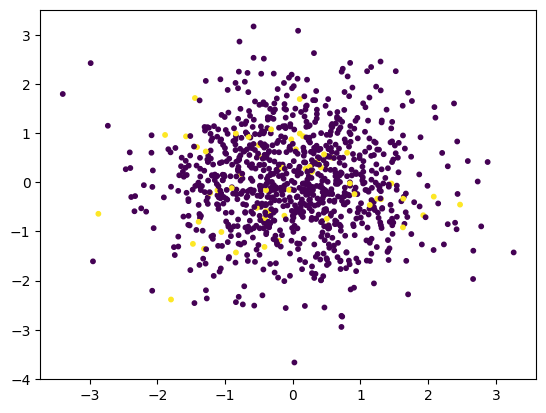

In [446]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)

model.fit(X, y)

LogisticRegression(random_state=0)

[ -5.59147508  -3.59344184  -3.66740846   0.37484919  -5.73040478
  -6.98925561  -3.07991929  -4.49653226  -5.90329279  -6.33625652
  -9.44712356  -1.8564931   -5.18729462  -4.0470678   -8.21674689
  -6.98300193  -5.41500515   0.38940871  -3.96692927  -3.94921769
  -2.96325811  -4.9139733    5.3759904   -5.18039885  -2.17842641
  -5.28091825  -7.28220033  -2.89071771  -4.64043344  -3.64559508
  -4.13913527  -2.87904871   1.09905776  -9.82996505  -4.60492394
  -7.45411496  -4.62943875   0.59465804  -3.42335532  -4.02094925
   2.26349208  -5.07706496  -6.52195939  -3.89611697  -8.4502117
 -10.17111163  -4.50543095  -3.1318393   -0.79909007  -4.87827433
   0.57030409  -3.7401432   -3.69976655  -3.11177662  -3.66597185
  -6.77536958  -5.14413635  -1.2306565   -4.98572197  -5.83778484
  -5.54012852   0.25804698  -5.32246621  -7.86365198  -2.94716675
  -3.35199566  -5.85214292  -4.10642303   3.59297436  -7.06976172
  -3.07405345  -5.48752889  -3.79895798  -4.64955942  -7.3965025
  -5.0283268

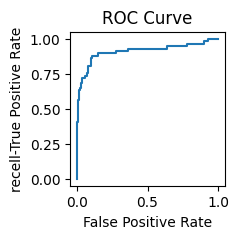

In [ ]:
from sklearn.metrics import roc_curve
# print(model.decision_function(X))
fpr, tpr, thr = roc_curve(y, model.decision_function(X))
plt.figure(figsize=(2, 2))
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("recell-True Positive Rate")
plt.title("ROC Curve")
plt.show()



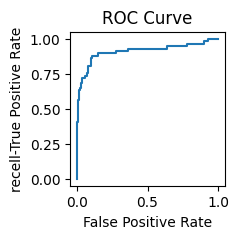

In [460]:
y_proba = model.predict_proba(X)[:,1]
fpr1, tpr1, thr1 = roc_curve(y, y_proba)
plt.figure(figsize=(2, 2))
plt.plot(fpr1, tpr1, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("recell-True Positive Rate")
plt.title("ROC Curve")
plt.show()

## 6-4. 두 모형의 혼동행렬이 같은 경우 (roc_curve 사용)


In [466]:
from sklearn.datasets import make_classification

X, y = make_classification(
    weights=[0.95, 0.05], # 0: 95%, 1: 5%
    n_samples=1000,
    random_state=5
)

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression(random_state=0)
model1.fit(X, y)

model2 = SVC(
    gamma=0.0001,  # 작을수록 경계면이 부드러운 곡선,형태로 커널 파라미터 (높을수록 모델 복잡도 증가)
    C=3000,  # 오차러용, 오분류 파라미터 (높을수록 모델 복잡도 증가)
    probability=True,  # 확률 추정 여부
)
model2.fit(X, y)

SVC(C=3000, gamma=0.0001, probability=True)

In [470]:
y_hat1 = model1.predict(X)
y_hat2 = model2.predict(X)

In [471]:


display(pd.crosstab(y, y_hat1))
display(pd.crosstab(y, y_hat2))


col_0,0,1
row_0,,
0,940,3
1,30,27


col_0,0,1
row_0,,
0,940,3
1,30,27


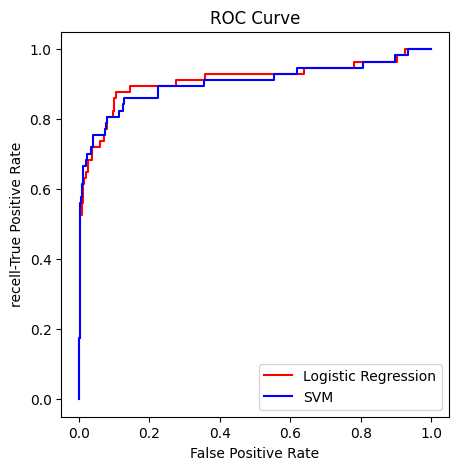

In [476]:
# 혼동행렬이 같으므로, 모든 score 값이 같음
# 남은 평가 방법은 roc_curve 사용 두 모델 성능 비교

fpr1, tpr1, thr1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y, model2.decision_function(X))

plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, color="r", label="Logistic Regression")
plt.plot(fpr2, tpr2, color="b", label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("recell-True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# AUC (Area Under Curve) 값 비교 : roc 커브 아랫부분 영역
# AUC = 1 : 완벽한 모델
# AUC < 0.5 : 최악의 모델
# AUC = 0.5 : 동전던지기 수준의 모델
from sklearn.metrics import auc

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

print(f"AUC1: {auc1:.4f}, AUC2: {auc2:.4f}")

AUC1: 0.9112, AUC2: 0.9037


In [ ]:
# winequality-red 데이터의 와인 등급을 분류하는 모델을 구현하고 가장 좋은 모델을 판단하세요 (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
# - 확률적 모형(QuadraticDiscriminantAnalysis, MultinormialNB, DecisionTreeClassifier, LogisticRegression) 클래스와판별함수 모형(SVC, MLPClassifier, Perceptron) 클래스를 한개씩 선택하여 구현하세요.
# - 모델 학습 후 교차분류표와 accuracy, precision, recall, 특이도, 위양성률, f1 score를출력하세요. ROC 커브의 auc(Area Under Curve) 값을 포함해서 가장 성능이 좋은 분류모형을 판단하세요
# 다음 표는 Wine Quality 데이터 셋 변수에 대한 설명입니다
# | No | 변수명                  | 변수설명                                |
# |----|-------------------------|------------------------------------------|
# | 1  | fixed acidity           | 결합산도                                 |
# | 2  | volatile acidity        | 휘발성 산도                              |
# | 3  | citric acid             | 구연산                                   |
# | 4  | residual sugar          | 발효 후 와인 속에 남아있는 당분          |
# | 5  | chlorides               | 염화물                                   |
# | 6  | free sulfur dioxide     | 유리 이산화황                            |
# | 7  | total sulfur dioxide    | 총 이산화황                              |
# | 8  | density                 | 밀도                                     |
# | 9  | pH                      | 산도                                     |
# | 10 | sulphates               | 황산염                                   |
# | 11 | alcohol                 | 알코올                                   |
# | 12 | quality                 | 와인 등급(0~10 사이의 점수)             |